In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv(r"D:\Farooq_Hussain\Python\Data Analysis\01 - EDA_Diabetes\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
def save_plot(name):
    plt.savefig(fr"D:\Farooq_Hussain\Python\Data Analysis\01 - EDA_Diabetes\images/{name}.png", dpi=300, bbox_inches="tight")

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
df.info()
df.describe()

Dataset contains 768 rows and 9 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Several columns in the dataset contain zero values where a measurement cannot realistically be zero (e.g., blood pressure, glucose level).
# These zeros are likely placeholders for missing entries.
# To handle this appropriately, we will replace such zeros with NaN.

cols_with_invalid_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zero] = df[cols_with_invalid_zero].replace(0, np.nan)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
cols_with_invalid_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_invalid_zero:
    df[col].fillna(df[col].median(), inplace=True)

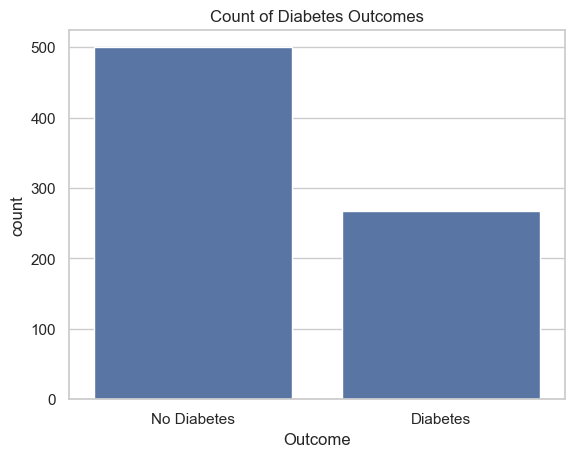

In [11]:
# Plots the distribution of diabetes vs. non-diabetes cases to check class balance in the target variable.

def save_plot(name):
    plt.savefig(fr"D:\Farooq_Hussain\Python\Data Analysis\01 - EDA_Diabetes\images/{name}.png", dpi=300, bbox_inches="tight")


sns.countplot(x='Outcome', data=df)
plt.title("Count of Diabetes Outcomes")
save_plot("count_of_diabetes_outcomes")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

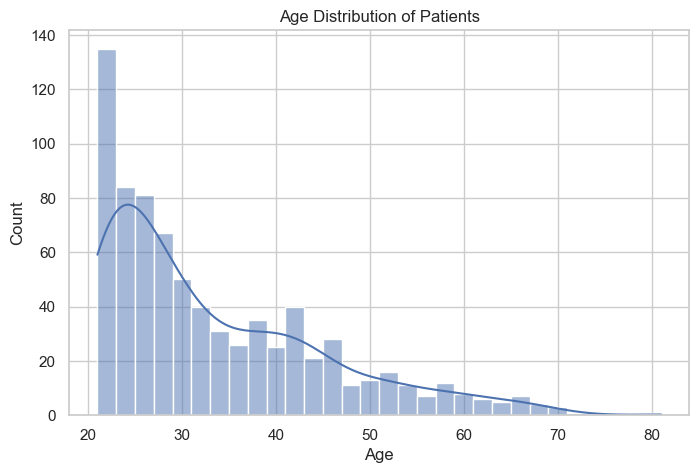

In [13]:
# Displays the age distribution of patients with a histogram and density curve to observe spread and common age ranges.

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
save_plot("age_distribution_of_patients")
plt.xlabel("Age")
plt.show()

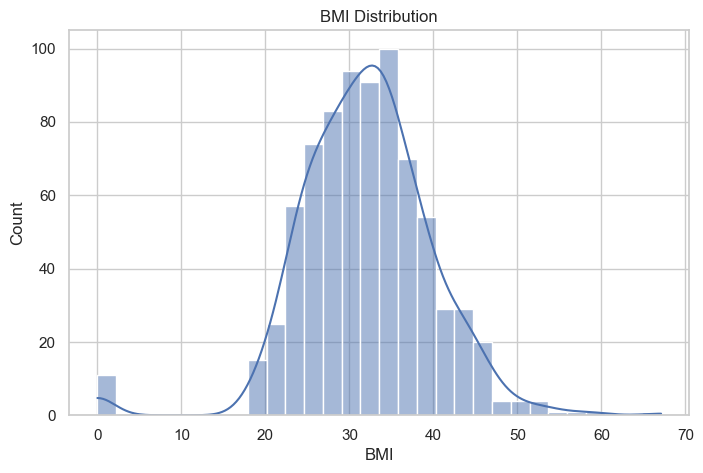

In [15]:
# BMI distribution

plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title("BMI Distribution")
save_plot("BMI_distribution")
plt.xlabel("BMI")
plt.show()

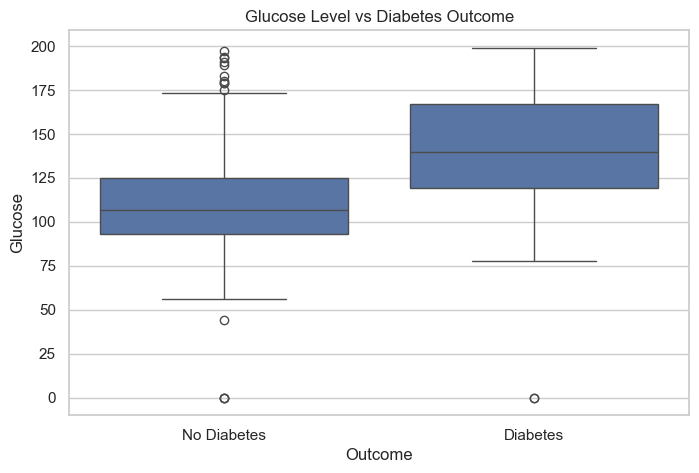

In [17]:
#  This plot will show how glucose levels differ between patients with and without diabetes.

plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose Level vs Diabetes Outcome")
save_plot("glucose_level_vs_diabetes_outcome")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()



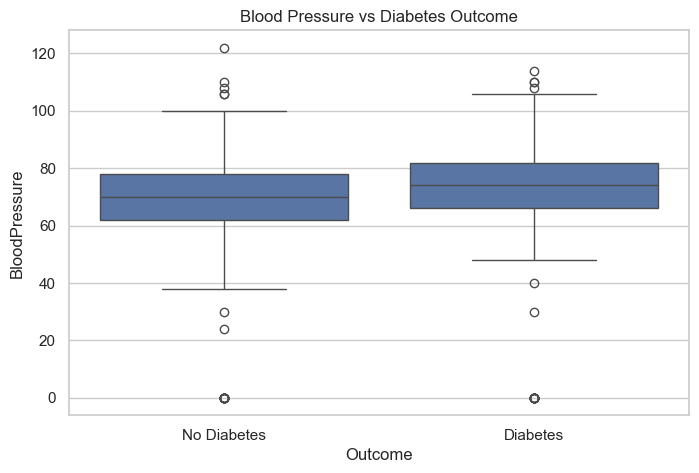

In [19]:
# This plot will compare blood pressure values for people with and without diabetes.

plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title("Blood Pressure vs Diabetes Outcome")
save_plot("blood_pressure_vs_diabetes_outcome")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


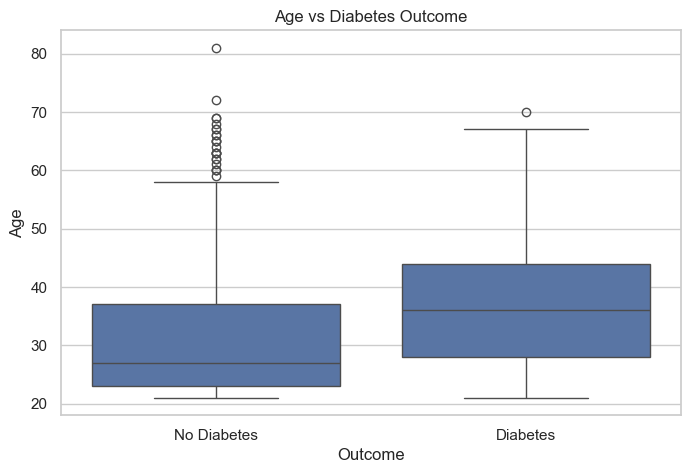

In [21]:
# This plot will compare patient ages between diabetic and non-diabetic groups.

plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Age vs Diabetes Outcome")
save_plot("age_vs_diabetes_outcome")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


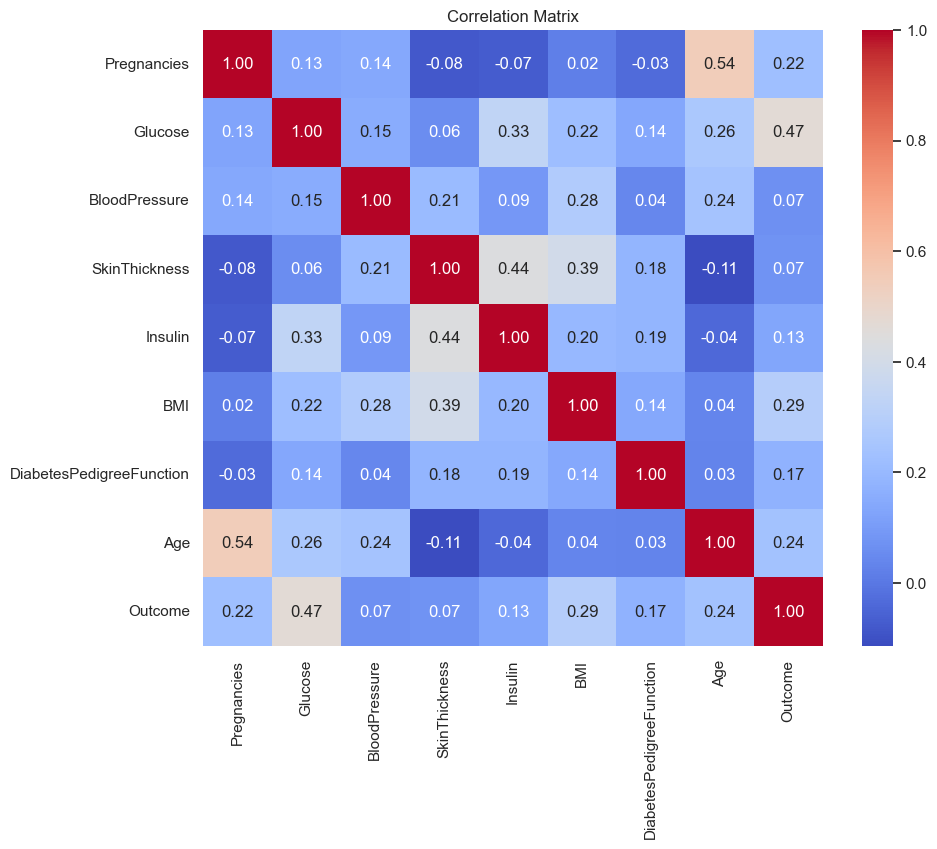

In [23]:
# These lines will calculate and visualize the correlations between numerical features.
# Correlation matrix

corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
save_plot("correlation_matrix")

In [21]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [ ]:
Final Summary of Insights

Dataset shows a slight class imbalance in diabetes outcomes.

Diabetic patients generally have higher Glucose levels, BMI and Age compared to non-diabetic patients.

Several medical features contained invalid zeros, which were treated as missing values and handled appropriately.

Correlation heatmap reveals Glucose, BMI and Age as important indicators for predicting diabetes.